In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import kstest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import grangercausalitytests

## **Задание 1.**

Данные взяты с Yahoo Finance. Так как Facebook вышел на IPO в 2012 году, то взять данные за 10 лет не удалось.

In [462]:
apple=pd.read_csv('AAPL.csv',parse_dates=['Date'], index_col='Date')
google=pd.read_csv('GOOG.csv',parse_dates=['Date'], index_col='Date')
fb=pd.read_csv('FB.csv',parse_dates=['Date'], index_col='Date')

In [463]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-01,37.098572,37.991428,36.994286,37.261429,32.257130,219118200
2010-06-02,37.791428,37.828571,37.189999,37.707142,32.642975,172137000
2010-06-03,37.882858,37.935715,37.201427,37.588570,32.540325,162526700
2010-06-04,36.887142,37.414288,36.375713,36.565716,31.654835,189576100
2010-06-07,36.898571,37.021427,35.792858,35.848572,31.034019,221735500
...,...,...,...,...,...,...
2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800
2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500


In [464]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-01,239.317978,244.613129,239.163559,240.284363,240.284363,5353500
2010-06-02,242.431305,246.012878,239.831055,245.763824,245.763824,5100500
2010-06-03,246.630569,253.051498,246.426331,251.855988,251.855988,7328700
2010-06-04,248.926956,253.674164,247.422592,248.428833,248.428833,7869900
2010-06-07,248.598190,249.519745,240.672897,241.853470,241.853470,7292500
...,...,...,...,...,...,...
2020-05-21,1408.000000,1415.489990,1393.449951,1402.800049,1402.800049,1385000
2020-05-22,1396.709961,1412.760010,1391.829956,1410.420044,1410.420044,1309400
2020-05-26,1437.270020,1441.000000,1412.130005,1417.020020,1417.020020,2060600


In [465]:
fb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400
2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900
2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200
2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500
2012-06-04,27.200001,27.650000,26.440001,26.900000,26.900000,35230300
...,...,...,...,...,...,...
2020-05-21,234.720001,237.199997,231.199997,231.389999,231.389999,47782600
2020-05-22,231.509995,235.990005,228.740005,234.910004,234.910004,33925600
2020-05-26,239.770004,240.899994,231.669998,232.199997,232.199997,33178300


## **Задание 2.**

Начнем с анализа returns для Apple, для подсчета в pandas есть метод - pct_change().

In [467]:
ret1=apple.Close.pct_change(-1).dropna()
print('RETURNS ON APPLE:\n{}\n'.format(ret1))
print(ret1.describe())

RETURNS ON APPLE:
Date
2010-06-01   -0.011820
2010-06-02    0.003154
2010-06-03    0.027973
2010-06-04    0.020005
2010-06-07    0.006457
                ...   
2020-05-20    0.007511
2020-05-21   -0.006397
2020-05-22    0.006820
2020-05-26   -0.004338
2020-05-27   -0.000440
Name: Close, Length: 2515, dtype: float64

count    2515.000000
mean       -0.000703
std         0.017364
min        -0.106990
25%        -0.009745
50%        -0.000765
75%         0.007081
max         0.147640
Name: Close, dtype: float64


Стационарность на взгляд есть, у гистограммы достаточно легкие хвосты:

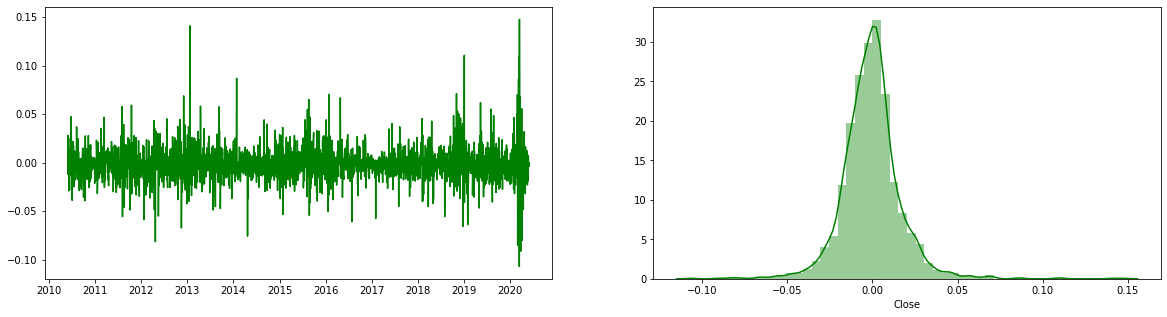

In [468]:
fig,(ax1,ax2)=plt.subplots(figsize=(20,5),nrows=1,ncols=2)
ax1.plot(ret1,color='green')
sns.distplot(ret1,ax=ax2,color='green')
plt.show()


Для проверки на нормальность воспользуемся тестом шапиро-уилка: p-value<0.05, а значит основную гипотезу о нормальности отвергаем.

In [469]:
print("p-value:",shapiro(ret1)[1])

p-value: 4.781860050444698e-34


Проверим на другие распределения с помощью теста Колмогорова, ситуация аналогична:

In [470]:
print(kstest(ret1, 't', args= (10,)))
print(kstest(ret1, 'cauchy', args= (0.0001,)))
print(kstest(ret1, 'beta', args= (5,4)))
print(kstest(ret1, 'gamma', args= (9,0.5)))


KstestResult(statistic=0.47320872182291934, pvalue=0.0)
KstestResult(statistic=0.4771090499826004, pvalue=0.0)
KstestResult(statistic=0.9985099732020679, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


Для стационарности применяем тест дикки-фуллера: p-value<0.05. Значит, очень маловероятно, что ряд нестационарен.

In [471]:
print('p-value:',sm.tsa.adfuller(ret1)[1])

p-value: 1.409620819076191e-17


Посмотрим, есть ли взаимосвязь между будущими и прошлыми значениями ряда. Считаем автокорреляцию с лагом от 0 до 50.

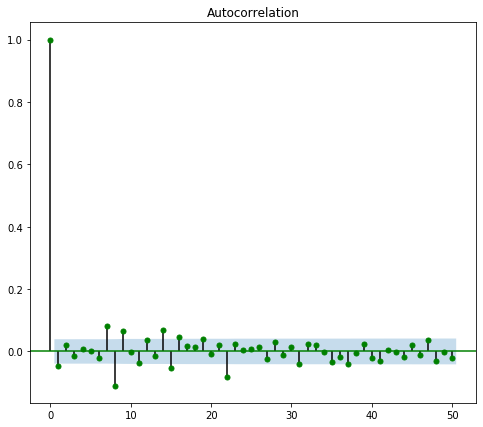

In [472]:
fig, ax = plt.subplots(figsize=(8,7))
plot_acf(ret1,ax=ax,lags=50,color='green')
plt.show()

В целом почти все значения корреляции находятся внутри доверительного интервала, что позволяет предположить о том, что связи нет.

Аналогичное делаем с  Google:

In [473]:
ret2=google.Close.pct_change(-1).dropna()
print('RETURNS ON GOOGLE:\n{}\n'.format(ret2))
print(ret2.describe())


RETURNS ON GOOGLE:
Date
2010-06-01   -0.022296
2010-06-02   -0.024189
2010-06-03    0.013795
2010-06-04    0.027187
2010-06-07    0.001526
                ...   
2020-05-20    0.002794
2020-05-21   -0.005403
2020-05-22   -0.004658
2020-05-26   -0.000578
2020-05-27    0.000783
Name: Close, Length: 2515, dtype: float64

count    2515.000000
mean       -0.000575
std         0.016128
min        -0.138321
25%        -0.008565
50%        -0.000578
75%         0.006459
max         0.124870
Name: Close, dtype: float64


Опять, стационарность на взгляд есть, у гистограммы достаточно легкие хвосты:

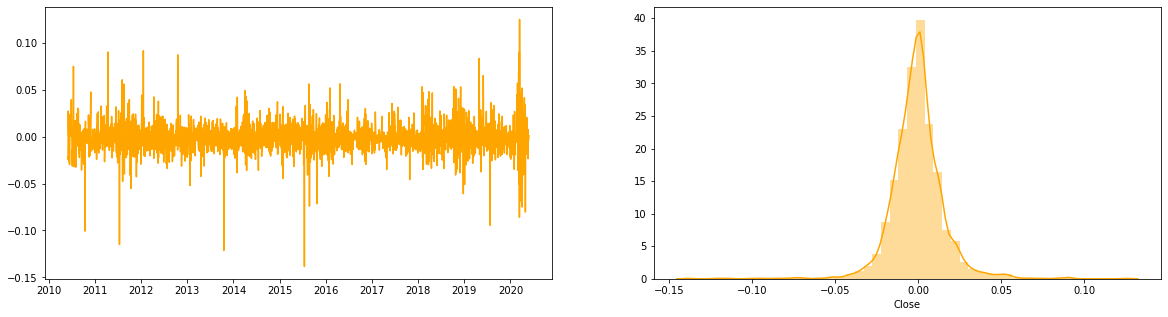

In [474]:
fig,(ax1,ax2)=plt.subplots(figsize=(20,5),nrows=1,ncols=2)
ax1.plot(ret2,color='orange')
sns.distplot(ret2,ax=ax2,color='orange')
plt.show()

Тест Шапиро показывает, что нет нормальности:

In [475]:
print("p-value:",shapiro(ret2)[1])

p-value: 3.8255232276104e-38


Так же и к другим распределениям:

In [476]:
print(kstest(ret2, 't', args= (10,)))
print(kstest(ret2, 'cauchy', args= (0.0001,)))
print(kstest(ret2, 'beta', args= (5,4)))
print(kstest(ret2, 'gamma', args= (9,0.5)))

KstestResult(statistic=0.47538927494178373, pvalue=0.0)
KstestResult(statistic=0.47839225784872463, pvalue=0.0)
KstestResult(statistic=0.9993200629486465, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


Стационарность есть:

In [477]:
print('p-value:',sm.tsa.adfuller(ret2)[1])

p-value: 8.268608407297366e-30


Зависимости нет:

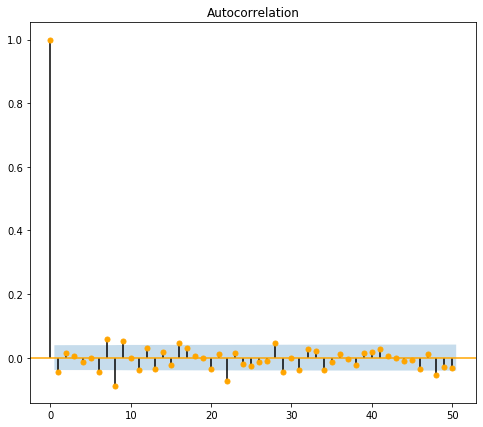

In [478]:
fig, ax = plt.subplots(figsize=(8,7))
plot_acf(ret2,ax=ax,lags=50,color='orange')
plt.show()

Остался Facebook:

In [479]:
ret3=fb.Close.pct_change(-1).dropna()
print('RETURNS ON FACEBOOK:\n{}\n'.format(ret3))
print(ret3.describe())

RETURNS ON FACEBOOK:
Date
2012-05-29    0.023058
2012-05-30   -0.047635
2012-05-31    0.067821
2012-06-01    0.030483
2012-06-04    0.039814
                ...   
2020-05-20   -0.006137
2020-05-21   -0.014984
2020-05-22    0.011671
2020-05-26    0.013354
2020-05-27    0.016322
Name: Close, Length: 2012, dtype: float64

count    2012.000000
mean       -0.000759
std         0.022869
min        -0.228463
25%        -0.011793
50%        -0.001053
75%         0.009185
max         0.233973
Name: Close, dtype: float64


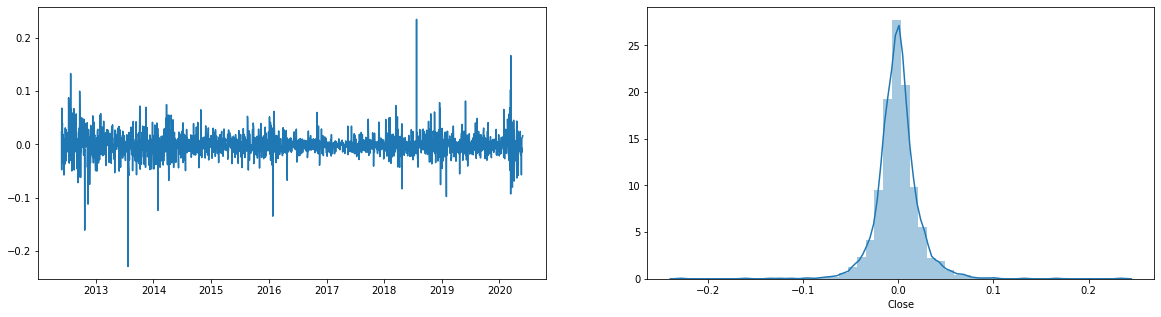

In [480]:
fig,(ax1,ax2)=plt.subplots(figsize=(20,5),nrows=1,ncols=2)
ax1.plot(ret3)
sns.distplot(ret3,ax=ax2)
plt.show()

Результаты по всем пунктам аналогичны первым двум:

In [481]:
print("p-value:",shapiro(ret3)[1])

p-value: 1.6809479533656995e-36


In [482]:
print(kstest(ret3, 't', args= (10,)))
print(kstest(ret3, 'cauchy', args= (0.0001,)))

KstestResult(statistic=0.46811159923981777, pvalue=0.0)
KstestResult(statistic=0.47249230970373807, pvalue=0.0)


In [483]:
print('p-value:',sm.tsa.adfuller(ret3)[1])

p-value: 1.7063175038216075e-27


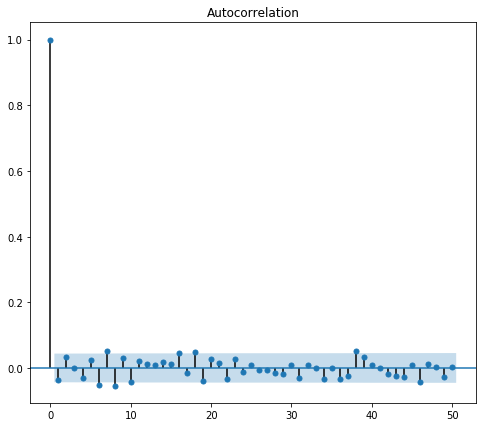

In [484]:
fig, ax = plt.subplots(figsize=(8,7))
plot_acf(ret3,ax=ax,lags=50)
plt.show()

Посмотрим на зависимость между этими рядами. А именно, проведем Granger Casuality Test для всех returns.

In [485]:
data=pd.concat([ret1,ret2],axis=1)
data1=pd.concat([ret2,ret1],axis=1)
data2=pd.concat([ret1[503:],ret3],axis=1)
data3=pd.concat([ret3,ret1[503:]],axis=1)
data4=pd.concat([ret2[503:],ret3],axis=1)
data5=pd.concat([ret3,ret2[503:]],axis=1)

In [501]:
grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7061  , p=0.0543  , df_denom=2511, df_num=1
ssr based chi2 test:   chi2=3.7105  , p=0.0541  , df=1
likelihood ratio test: chi2=3.7078  , p=0.0542  , df=1
parameter F test:         F=3.7061  , p=0.0543  , df_denom=2511, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9413  , p=0.1437  , df_denom=2508, df_num=2
ssr based chi2 test:   chi2=3.8904  , p=0.1430  , df=2
likelihood ratio test: chi2=3.8874  , p=0.1432  , df=2
parameter F test:         F=1.9413  , p=0.1437  , df_denom=2508, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5096  , p=0.2100  , df_denom=2505, df_num=3
ssr based chi2 test:   chi2=4.5415  , p=0.2086  , df=3
likelihood ratio test: chi2=4.5374  , p=0.2090  , df=3
parameter F test:         F=1.5096  , p=0.2100  , df_denom=2505, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3935  , p=0.

{1: ({'ssr_ftest': (3.7060769032654717, 0.054327509554037305, 2511.0, 1),
   'ssr_chi2test': (3.710504713185742, 0.054071038587236775, 1),
   'lrtest': (3.7077691695812973, 0.054159731410610604, 1),
   'params_ftest': (3.7060769032652976, 0.054327509554037305, 2511.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9413221044387963, 0.1437296794712262, 2508.0, 2),
   'ssr_chi2test': (3.890384727635323, 0.1429597204153032, 2),
   'lrtest': (3.887376472364849, 0.14317491187864828, 2),
   'params_ftest': (1.9413221044388593, 0.1437296794712262, 2508.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.5096103539624461, 0.2100141893282033, 2505.0, 3),
   'ssr_chi2test': (4.54148647802834, 0.2086195053647616, 3),
   'lrtest': (4.537386104992038, 0.2089796760566713, 3),
   'params_ftest': (1.509610353962523, 0.2100141893282033, 2505.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [487]:
grangercausalitytests(data1, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5661  , p=0.0060  , df_denom=2511, df_num=1
ssr based chi2 test:   chi2=7.5752  , p=0.0059  , df=1
likelihood ratio test: chi2=7.5638  , p=0.0060  , df=1
parameter F test:         F=7.5661  , p=0.0060  , df_denom=2511, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.1807  , p=0.0057  , df_denom=2508, df_num=2
ssr based chi2 test:   chi2=10.3820 , p=0.0056  , df=2
likelihood ratio test: chi2=10.3606 , p=0.0056  , df=2
parameter F test:         F=5.1807  , p=0.0057  , df_denom=2508, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6576  , p=0.0120  , df_denom=2505, df_num=3
ssr based chi2 test:   chi2=11.0033 , p=0.0117  , df=3
likelihood ratio test: chi2=10.9793 , p=0.0118  , df=3
parameter F test:         F=3.6576  , p=0.0120  , df_denom=2505, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4951  , p=0.

{1: ({'ssr_ftest': (7.566126923331483, 0.005990204553269208, 2511.0, 1),
   'ssr_chi2test': (7.575166501495558, 0.005917791320577768, 1),
   'lrtest': (7.563776657341805, 0.005955306408611723, 1),
   'params_ftest': (7.56612692333203, 0.005990204553267315, 2511.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.180677747195401, 0.005684536948364829, 2508.0, 2),
   'ssr_chi2test': (10.382012104228105, 0.005566403904566809, 2),
   'lrtest': (10.360625270586752, 0.005626247175981914, 2),
   'params_ftest': (5.1806777471954115, 0.005684536948364829, 2508.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.6575528848745065, 0.011994467240378765, 2505.0, 3),
   'ssr_chi2test': (11.00332077461648, 0.011707932439269004, 3),
   'lrtest': (10.979291979288973, 0.011838380306153492, 3),
   'params_ftest': (3.6575528848744043, 0.011994467240381834, 2505.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [488]:
grangercausalitytests(data2, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1745  , p=0.1405  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=2.1778  , p=0.1400  , df=1
likelihood ratio test: chi2=2.1766  , p=0.1401  , df=1
parameter F test:         F=2.1745  , p=0.1405  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0923  , p=0.3357  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=2.1900  , p=0.3345  , df=2
likelihood ratio test: chi2=2.1888  , p=0.3347  , df=2
parameter F test:         F=1.0923  , p=0.3357  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7921  , p=0.4982  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=2.3846  , p=0.4965  , df=3
likelihood ratio test: chi2=2.3832  , p=0.4968  , df=3
parameter F test:         F=0.7921  , p=0.4982  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6523  , p=0.

{1: ({'ssr_ftest': (2.174510462857859, 0.140470919928647, 2008.0, 1),
   'ssr_chi2test': (2.1777592334696982, 0.14001819059862505, 1),
   'lrtest': (2.1765809107164387, 0.14012545650175134, 1),
   'params_ftest': (2.174510462857551, 0.14047091992867403, 2008.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0922752101873907, 0.33565192378218967, 2005.0, 2),
   'ssr_chi2test': (2.18999817703407, 0.3345399118758994, 2),
   'lrtest': (2.1888059852135484, 0.3347393891970886, 2),
   'params_ftest': (1.0922752101873219, 0.33565192378218006, 2005.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.7920994726801465, 0.49821492243396504, 2002.0, 3),
   'ssr_chi2test': (2.3846071537678535, 0.4965064281187225, 3),
   'lrtest': (2.383193053312425, 0.49677089848937706, 3),
   'params_ftest': (0.792099472680186, 0.49821492243396504, 2002.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [489]:
grangercausalitytests(data3, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.4001 , p=0.0013  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=10.4157 , p=0.0012  , df=1
likelihood ratio test: chi2=10.3888 , p=0.0013  , df=1
parameter F test:         F=10.4001 , p=0.0013  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5175  , p=0.0041  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=11.0626 , p=0.0040  , df=2
likelihood ratio test: chi2=11.0323 , p=0.0040  , df=2
parameter F test:         F=5.5175  , p=0.0041  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8265  , p=0.0095  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=11.5197 , p=0.0092  , df=3
likelihood ratio test: chi2=11.4868 , p=0.0094  , df=3
parameter F test:         F=3.8265  , p=0.0095  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1731  , p=0.

{1: ({'ssr_ftest': (10.400129217390212, 0.0012803048432498154, 2008.0, 1),
   'ssr_chi2test': (10.415667259049659, 0.0012495070038827114, 1),
   'lrtest': (10.38878685576492, 0.0012678289568483702, 1),
   'params_ftest': (10.40012921739005, 0.0012803048432498928, 2008.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.517541516729399, 0.004076920616025298, 2005.0, 2),
   'ssr_chi2test': (11.062601943766676, 0.003960832803615009, 2),
   'lrtest': (11.032270111001708, 0.0040213602799109745, 2),
   'params_ftest': (5.517541516729346, 0.004076920616025298, 2005.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.8265285419763657, 0.009527086480778081, 2002.0, 3),
   'ssr_chi2test': (11.51972403720857, 0.009223248277020122, 3),
   'lrtest': (11.486822363480314, 0.009364709935599411, 3),
   'params_ftest': (3.8265285419762947, 0.009527086480779358, 2002.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.

In [490]:
grangercausalitytests(data4, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0024  , p=0.9612  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.0024  , p=0.9611  , df=1
likelihood ratio test: chi2=0.0024  , p=0.9611  , df=1
parameter F test:         F=0.0024  , p=0.9612  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2894  , p=0.7488  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.5802  , p=0.7482  , df=2
likelihood ratio test: chi2=0.5801  , p=0.7482  , df=2
parameter F test:         F=0.2894  , p=0.7488  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2149  , p=0.8861  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.6469  , p=0.8856  , df=3
likelihood ratio test: chi2=0.6468  , p=0.8856  , df=3
parameter F test:         F=0.2149  , p=0.8861  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3124  , p=0.

{1: ({'ssr_ftest': (0.0023709005578421522, 0.9611696781180857, 2008.0, 1),
   'ssr_chi2test': (0.0023744427399504824, 0.9611358591627553, 1),
   'lrtest': (0.0023744413374515716, 0.9611358706315086, 1),
   'params_ftest': (0.002370900557630607, 0.9611696781199098, 2008.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.28936345735940344, 0.7487712837916681, 2005.0, 2),
   'ssr_chi2test': (0.5801701239824447, 0.7481999214965174, 2),
   'lrtest': (0.5800864093980636, 0.7482312397746931, 2),
   'params_ftest': (0.28936345735924013, 0.7487712837917517, 2005.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.21488238791477657, 0.8861263201701174, 2002.0, 3),
   'ssr_chi2test': (0.6469011748063729, 0.8856163742279657, 3),
   'lrtest': (0.6467970455632894, 0.885640552361401, 3),
   'params_ftest': (0.21488238791485106, 0.8861263201700658, 2002.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

In [491]:
grangercausalitytests(data5, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6138  , p=0.0318  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=4.6207  , p=0.0316  , df=1
likelihood ratio test: chi2=4.6154  , p=0.0317  , df=1
parameter F test:         F=4.6138  , p=0.0318  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5619  , p=0.0774  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=5.1365  , p=0.0767  , df=2
likelihood ratio test: chi2=5.1300  , p=0.0769  , df=2
parameter F test:         F=2.5619  , p=0.0774  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1484  , p=0.0922  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=6.4676  , p=0.0909  , df=3
likelihood ratio test: chi2=6.4572  , p=0.0914  , df=3
parameter F test:         F=2.1484  , p=0.0922  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5643  , p=0.

{1: ({'ssr_ftest': (4.6138464292255845, 0.03183414083868432, 2008.0, 1),
   'ssr_chi2test': (4.620739626081996, 0.03158761484960151, 1),
   'lrtest': (4.615439132627216, 0.0316853813420093, 1),
   'params_ftest': (4.613846429225649, 0.03183414083868121, 2008.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.561880845705323, 0.07741203815904425, 2005.0, 2),
   'ssr_chi2test': (5.13653915198773, 0.07666809902292442, 2),
   'lrtest': (5.129987119405996, 0.07691967682580335, 2),
   'params_ftest': (2.5618808457054314, 0.077412038159027, 2005.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.1483663288602237, 0.09220666176692194, 2002.0, 3),
   'ssr_chi2test': (6.467634297722562, 0.0909477037600453, 3),
   'lrtest': (6.457245862529817, 0.0913639571251923, 3),
   'params_ftest': (2.1483663288601407, 0.09220666176693586, 2002.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

По результатам тестов и полученным p-value можно сделать интересное заключение. Значения ряда для доходностей Apple как то влияли на ряды для Google и Facebook. (Тесты 2 и 4).

## **Задание 3.**

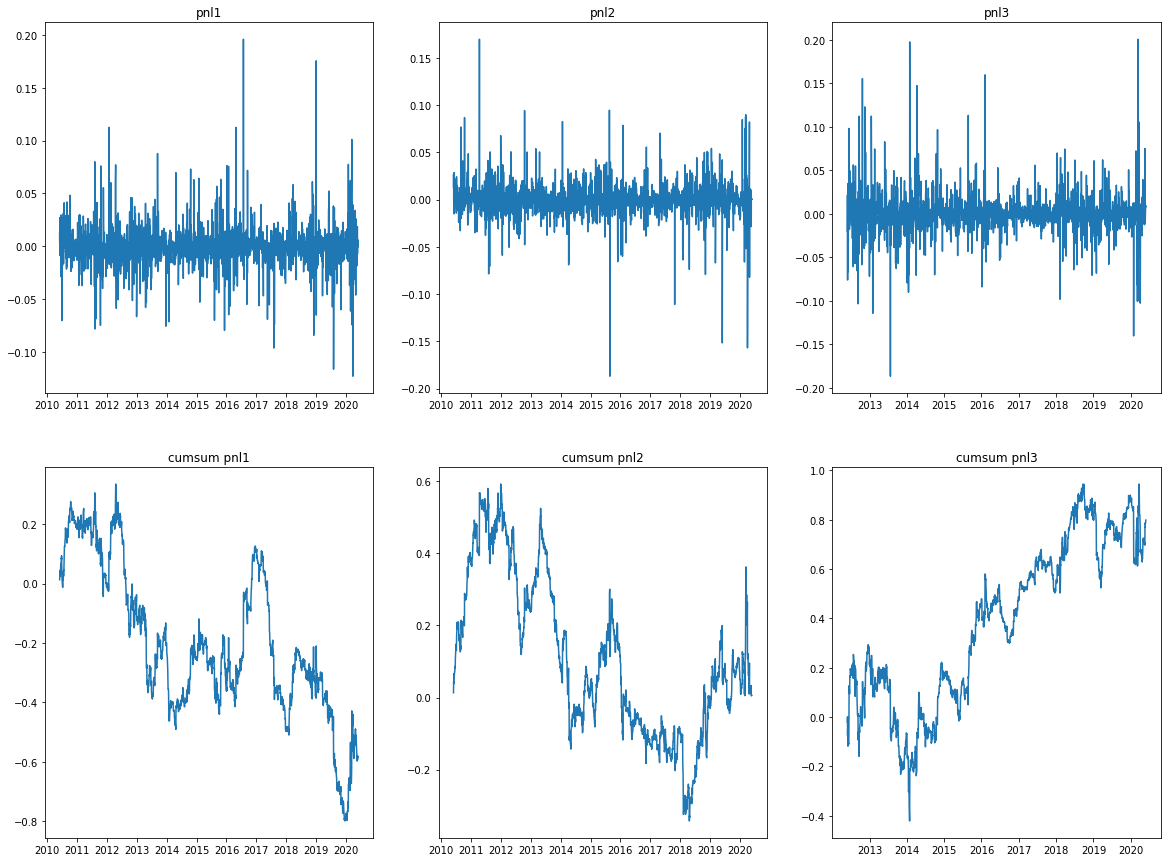

In [503]:
f1=norm.rvs(size=2515)
f2=norm.rvs(size=2515)
f3=norm.rvs(size=2012)
pnl1=f1*ret1
pnl2=f2*ret2
pnl3=f3*ret3
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(figsize=(20,15),nrows=2,ncols=3)
ax1.plot(pnl1)
ax1.set_title('pnl1')
ax2.plot(pnl2)
ax2.set_title('pnl2')
ax3.plot(pnl3)
ax3.set_title('pnl3')
ax4.plot(pnl1.cumsum())
ax4.set_title('cumsum pnl1')
ax5.plot(pnl2.cumsum())
ax5.set_title('cumsum pnl2')
ax6.plot(pnl3.cumsum())
ax6.set_title('cumsum pnl3')
plt.show()

## **Задание 4**

Сгенерируем 100 выборок длины 2515 (значения f_i). Посчитаем для каждого случая pnl и sharp_ratio. Заметим, что hit_rate для каждого случая можно посчитать следующим образом - это количество положительных элементов в pnl. Это обьясняется тем, что знак r_i показывает направление движения акции, и тогда совпадение знаков f_i и r_i означает, что направления движения цены угадано. Остается заметить, что это эквивалентно тому, что f_i*r_i>0

In [493]:
f=np.zeros(100*2515).reshape(100,2515)
for i in range(100):
    f[i]=norm.rvs(size=2515)


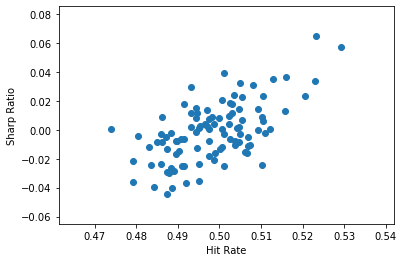

In [494]:
pnl=np.zeros(10*2515).reshape(100,2515)
sharp=np.zeros(100)
h=np.zeros(100)
for i in range(100):
    pnl[i]=f[i]*ret1
    sharp[i]=pnl[i].mean()/(pnl[i].std())
    h[i]=len(pnl[i][pnl[i]>0])/2515
plt.scatter(h,sharp)
plt.xlabel('Hit Rate')
plt.ylabel('Sharp Ratio')
plt.show()